### Step 1. Prepare the dataset

For this analysis, we will start with the preprocessed dataset "item-genre-spec.csv". This dataset has all the categorical values, hence usual clustering algorithms like K Means are not applicable in this scenario as it works better for continuous variables.

In [52]:
import pandas as pd
items_df = pd.read_csv("/Users/akshay/sjsu-cmpe-256-group-project/experiment3/item-genre-spec.csv", sep=",")

items_df.head()

,item_id,publisher,developer,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,...,spec_steam_workshop,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards
0,761140,Kotoshiro,Kotoshiro,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,643980,"Making Fun, Inc.",Secret Level SRL,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,670290,Poolians.com,Poolians.com,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,767400,u5f7cu5cb8u9886u57df,u5f7cu5cb8u9886u57df,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,772540,Trickjump Games Ltd,Trickjump Games Ltd,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
len(items_df['developer'].unique())

10234

In [54]:
len(items_df['publisher'].unique())

7706

As we can see, the distinct values for developer and publisher are quite high and all other columns are binary categorical features. Since this won't add value to the analysis, we will remove those features

In [55]:
items_df.drop(['item_id', 'developer', 'publisher'], axis=1, inplace=True)

In [56]:
items_df.shape

(29941, 53)

In [57]:
items_df.head()

,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,genre_free_to_play,genre_indie,genre_utilities,...,spec_steam_workshop,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt

clustering_costs = []
for i in list(range(1,50,5)):
    kmode = KModes(n_clusters=i, init = "Cao", verbose=1, n_jobs=-1)
    kmode.fit_predict(items_df)
    clustering_costs.append(kmode.cost_)

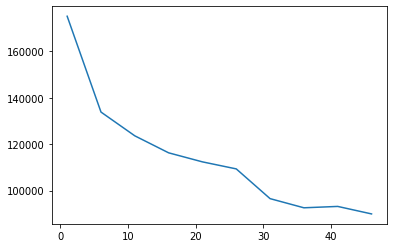

In [68]:
#y = np.array([i for i in range(1,len(clustering_costs)+1,1)])
y = np.array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])
plt.plot(y,clustering_costs)

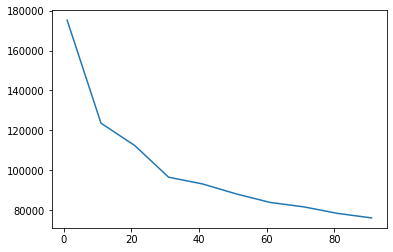

In [69]:
clustering_costs_2 = []
for i in list(range(1,100,10)):
    kmode = KModes(n_clusters=i, init = "Cao", verbose=1, n_jobs=-1)
    kmode.fit_predict(items_df)
    clustering_costs_2.append(kmode.cost_)
    
y = np.array([i for i in range(1,100,10)])
plt.plot(y,clustering_costs_2)

In [70]:
kmodes_final_model = KModes(n_clusters=30, init = "Cao", verbose=1, n_jobs=-1)
game_clusters = kmodes_final_model.fit_predict(items_df)

In [83]:
game_clusters_df = pd.DataFrame(game_clusters)
game_clusters_df.columns = ['predicted_cluster']
combined_df = pd.concat([items_df, game_clusters_df], axis = 1)
combined_df.head(10)

,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,genre_free_to_play,genre_indie,genre_utilities,...,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards,predicted_cluster
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,9
1,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,29
2,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,17
5,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,15
6,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,15
7,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,15
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


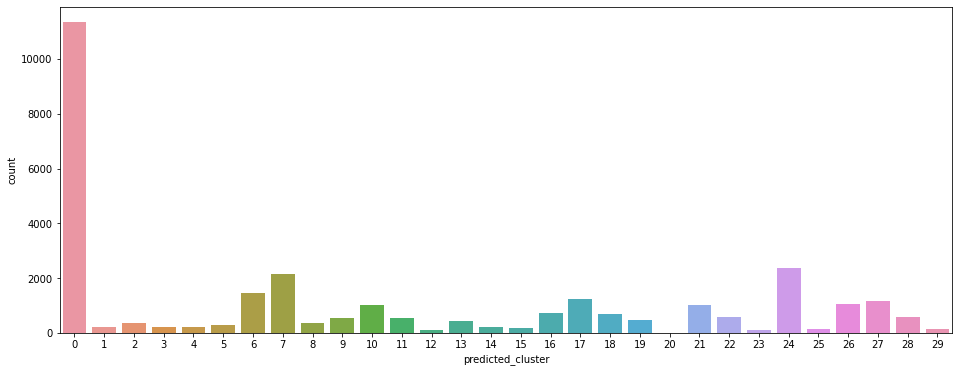

In [112]:
import seaborn as sns
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="predicted_cluster", data=combined_df)